# Titanic Regression Model

**Author**: Elen Tesfai  
**Date**: April 01, 2025

---

## Introduction

In this notebook, I will build and evaluate various regression models to predict the `Fare` of passengers aboard the Titanic. The Titanic dataset, which contains both categorical and numerical features, is used widely in data science for machine learning applications.

We will explore and compare several regression models to predict the fare paid by the passengers. The models to be explored in this lab are:

- **Linear Regression**: A simple and commonly used method for predictive modeling.
- **Ridge Regression**: A variant of linear regression that introduces an L2 regularization term to prevent overfitting.
- **ElasticNet Regression**: A combination of L1 and L2 regularization, combining the strengths of both Lasso and Ridge regression.
- **Polynomial Regression**: A non-linear model that introduces polynomial features to capture more complex relationships.

The ultimate goal is to find which model performs the best on this dataset based on the evaluation metrics and make predictions that generalize well to unseen data.

---

### Key Steps:
1. **Import and Inspect Data**: Load the Titanic dataset and perform initial exploration.
2. **Data Preparation and Exploration**: Clean and prepare the data for modeling.
3. **Feature Selection and Engineering**: Choose the most relevant features and create new features if necessary.
4. **Model Training and Evaluation**: Train and evaluate multiple regression models.
5. **Comparison of Models**: Compare the performance of each model and select the best one.
6. **Final Reflections and Insights**: Summarize the findings and discuss the best-performing model.

Let’s begin by importing the necessary libraries and loading the Titanic dataset.

---

## Section 1: Import and Inspect the Data

First, we need to import the libraries and load the Titanic dataset.

In [21]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load Titanic dataset (using a CSV file)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Reflection 1: Data Inspection

1) **How many data instances are there?**
   - There are 891 data instances (rows) in the Titanic dataset.

2) **How many features are there?**
   - There are 12 features (columns) in the dataset.

3) **What are the names?**
   - The feature names are: `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.

4) **Are there any missing values?**
   - Yes, there are missing values in the following columns:
     - `Age`: 177 missing values
     - `Cabin`: 687 missing values
     - `Embarked`: 2 missing values

5) **Are there any non-numeric features?**
   - Yes, the features `Name`, `Sex`, `Ticket`, and `Embarked` are non-numeric and need to be encoded for modeling.

6) **Are the data instances sorted on any of the attributes?**
   - No, the data instances do not appear to be sorted based on any attribute.

7) **What are the units of age?**
   - The unit of `Age` is years.

8) **What are the minimum, median, and max age?**
   - **Min Age**: 0.42 8years
   - **Median Age**: 22.0 years
   - **Max Age**: 80.0 years

9) **What two different features have the highest correlation?**
   - The features `Parch` and `SibSp` are likely to have the highest correlation, as they both reflect family size aboard the Titanic.

10) **Are there any categorical features that might be useful for prediction?**
    - Yes, `Sex`, `Pclass`, and `Embarked` are categorical features that may be useful for predicting survival (`Survived`) or `Fare`.

## Section 2: Data Exploration and Preparation

In this section, we will explore the dataset further, check for missing values, and perform necessary preprocessing steps to get the data ready for model training. This includes handling missing data, encoding categorical variables, and splitting the dataset into training and testing sets.

### 2.1 Inspecting Missing Values

We will start by checking for any missing values in the dataset and addressing them accordingly.


In [22]:
# Check for missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Reflection 2.1: Inspecting Missing Values

**Patterns/Anomalies:**
- **Age**: 177 missing values, important for prediction.
- **Cabin**: 687 missing values, likely to be dropped due to high missing rate.
- **Embarked**: Only 2 missing values, can be imputed or dropped.

**Potential Predictors:**
- **Fare**: The target variable.
- **Pclass**, **Age**, and **Embarked**: Likely to be significant predictors for `Fare`.

**Class Imbalances:**
- No major imbalance for regression modeling (target is continuous `Fare`).
- The `Survived` column might have an imbalance, but it’s not relevant for this regression task.

In summary, we should handle missing `Age` and `Cabin` appropriately and focus on `Pclass`, `Age`, and `Embarked` for prediction.

### 2.2 Handling Missing Values

Once we identify columns with missing data, we will fill or remove those values based on their nature.

- **Age**: We will fill missing values with the median value of the `Age` column.
- **Cabin**: Since a large portion of data in this column is missing, we will drop the `Cabin` column altogether.
- **Embarked**: The two missing values in the `Embarked` column will be filled with the most frequent value, which is 'S' (Southampton).

Below is the code to handle missing values in the dataset:


In [23]:
# 2.2 Handling Missing Values

# Check for missing values in the dataset
print("Before handling missing values:")
print(df.isnull().sum())

# 1. Fill missing 'Age' values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Drop the 'Cabin' column since most values are missing
df = df.drop('Cabin', axis=1)

# 3. Fill missing 'Embarked' values with the most frequent category (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check if any missing values remain
print("\nAfter handling missing values:")
print(df.isnull().sum())

Before handling missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After handling missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 2.3 Encoding Categorical Variables
We need to convert categorical variables, such as `Sex` and `Embarked`, into numerical values for regression modeling. This step ensures that the models can work with these features as numeric inputs.

In [24]:
import pandas as pd

# Load your dataset (assuming you've already loaded your Titanic dataset as df)
# df = pd.read_csv("path_to_your_data.csv")  # Uncomment and specify the correct file path if needed

# Check the column names to make sure 'Embarked' exists
print("Original column names:")
print(df.columns)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the columns after cleaning
print("Cleaned column names:")
print(df.columns)

# Convert 'Sex' column to numerical values (0 = male, 1 = female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Check if 'Embarked' has already been one-hot encoded
if 'Embarked' in df.columns:
    print("Embarked column exists, performing one-hot encoding...")
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
else:
    print("'Embarked' column has already been one-hot encoded.")

# Display the first few rows of the modified dataframe to verify changes
print("Modified DataFrame:")
print(df.head())

# Optional: Check the column names and verify the new dummy variables for Embarked
print("Final column names:")
print(df.columns)

Original column names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Cleaned column names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Embarked column exists, performing one-hot encoding...
Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel

### Reflection 2.3: Categorical Variables and Family Size

1. **Why might family size be a useful feature for predicting survival?**
   - Family size can indicate the level of support a passenger had during the crisis. Passengers with families may have had better chances of survival due to mutual support, potential priority for lifeboats, and emotional support.

2. **Why convert categorical data to numeric?**
   - Categorical data needs to be converted to numeric because most machine learning models can only process numbers. Numeric data allows algorithms to perform mathematical calculations and create accurate predictions. Methods like one-hot encoding are used to convert categorical variables into a usable format.

# Section 3: Feature Selection and Justification
# 3.1 Choose Features and Target

# Define the target variable (Survived) and the feature variables
target = 'Survived'

# Feature variables (independent variables)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_

In [26]:
# Define the target variable (Survived) and the feature variables
target = 'Survived'

# Feature variables (independent variables)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

# Prepare the feature set (X) and target set (y)
X = df[features]
y = df[target]

# Display the first few rows of the features and target to verify
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True

Target (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


### 3.2 Define X and y

In this step, we explicitly define the feature set (X) and the target variable (y) for training and testing a machine learning model. Since you've already prepared your feature set (X) and target (y), I'll summarize the script for clarity.

Here's the code for defining `X` (features) and `y` (target), assuming you've already chosen the relevant features for predicting survival:

In [29]:
# Define the features (X) and target (y)

# X represents the features (independent variables) for the model
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# y represents the target (dependent variable) which is 'Survived'
y = df['Survived']

# Display the first few rows of the features and target to verify
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True

Target (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


### Reflection 3: Feature Selection

#### Why are these features selected?

The features selected for the Titanic survival prediction model are based on both domain knowledge and the understanding of what could potentially influence a passenger’s chances of survival. The selected features are:

1. **Pclass**: The class of the passenger (1st, 2nd, or 3rd), which may indicate socio-economic status and access to lifeboats.
2. **Sex**: Gender, since historically, women and children had a higher chance of survival in maritime disasters due to "women and children first" policies.
3. **Age**: Age may affect survival, with children and elderly passengers possibly having a better chance of survival.
4. **SibSp**: The number of siblings or spouses aboard, which could provide insight into family survival dynamics.
5. **Parch**: The number of parents or children aboard, another feature related to family structure and potential priority in lifeboat boarding.
6. **Fare**: The fare paid for the ticket, which could reflect a passenger’s socio-economic status, potentially influencing access to lifeboats or cabins.
7. **Embarked_Q and Embarked_S**: The port where the passenger boarded (C, Q, or S). The boarding point may influence survival chances due to differences in the number of lifeboats available or evacuation order.

#### Are there any features that are likely to be highly predictive of survival?

Some features are likely to be highly predictive of survival based on historical patterns in disasters:

1. **Pclass**: Passengers in 1st class generally had a higher survival rate compared to those in 2nd or 3rd class. First-class passengers had more access to lifeboats and were located nearer to the deck, so this is likely to be a significant predictor of survival.
  
2. **Sex**: Gender is a strong predictor. Women, particularly in the early stages of the disaster, were given priority during evacuation, so this feature is likely highly predictive.

3. **Age**: Children and elderly passengers may have had better chances of survival, as the "women and children first" protocol was often prioritized. Therefore, age could be a strong predictor.

4. **Fare**: Higher fare-paying passengers, often from the 1st class, were more likely to survive due to better access to lifeboats and cabins located closer to the deck. 

Features like **SibSp** and **Parch** might also have some predictive power but are likely weaker compared to **Pclass**, **Sex**, **Age**, and **Fare**, as these features are more indirectly related to survival. However, if a passenger had family members in higher classes, this could influence their survival chances.

### Conclusion:
The selected features have logical relevance to survival during the Titanic disaster, with **Pclass**, **Sex**, and **Age** expected to be the most predictive of survival. Other features like **Fare**, **SibSp**, and **Parch** are also useful but may not have as strong an influence on the target variable.

 4. Model Training and Evaluation

In this section, we will train and evaluate multiple regression models to predict Titanic survival using the dataset. We'll explore four different types of regression models: Linear Regression, Ridge Regression, ElasticNet Regression, and Polynomial Regression.

### 4.1 Linear Regression

Linear regression is a fundamental regression technique used to model the relationship between the target variable and input features. We train this model to make predictions for Titanic fares.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Linear Regression Mean Squared Error: 0.13507401231462163


### 4.2 Ridge Regression

Ridge regression adds an L2 regularization term to the linear regression model. This helps reduce overfitting by penalizing large coefficients in the model. We use Ridge regression to test whether regularization improves prediction accuracy.

In [31]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

Ridge Regression Mean Squared Error: 0.13504191799285126


### 4.3 ElasticNet Regression

ElasticNet is a combination of both L1 (Lasso) and L2 (Ridge) regularization. We use this model to evaluate a balance between Lasso and Ridge regularization, which could potentially offer better model performance for the Titanic dataset.

In [32]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet Regression model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio=0.5 is a balanced mix of Lasso and Ridge

# Train the model
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_en = elasticnet_model.predict(X_test)

# Evaluate the model
mse_en = mean_squared_error(y_test, y_pred_en)
print(f"ElasticNet Regression Mean Squared Error: {mse_en}")

ElasticNet Regression Mean Squared Error: 0.2244256292451246


### 4.4 Polynomial Regression

Polynomial regression is used to model non-linear relationships between features and the target variable. By adding polynomial features, we can capture more complex patterns in the data that linear models may miss.

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initialize the PolynomialFeatures object (degree=2 for quadratic features)
poly = PolynomialFeatures(degree=2)

# Transform the features to include polynomial terms
X_poly = poly.fit_transform(X)

# Split the transformed data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model for polynomial features
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train_poly, y_train_poly)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")

Polynomial Regression Mean Squared Error: 0.14957040424826307


## 4. Model Training and Evaluation

### 4.1 Linear Regression
Linear regression is a fundamental regression technique used to model the relationship between the target variable and input features. 

- **Linear Regression Mean Squared Error**: 0.13507401231462163

### 4.2 Ridge Regression
Ridge regression adds an L2 regularization term to the linear regression model. This helps reduce overfitting by penalizing large coefficients in the model.

- **Ridge Regression Mean Squared Error**: 0.13504191799285126

### 4.3 ElasticNet Regression
ElasticNet is a combination of both L1 (Lasso) and L2 (Ridge) regularization. We use this model to evaluate a balance between Lasso and Ridge regularization, which could potentially offer better model performance for the Titanic dataset.

- **ElasticNet Regression Mean Squared Error**: 0.2244256292451246

### 4.4 Polynomial Regression
Polynomial regression is used to model non-linear relationships between features and the target variable. By adding polynomial features, we can capture more complex patterns in the data that linear models may miss.

- **Polynomial Regression Mean Squared Error**: 0.14957040424826307

# 5. Model Comparison and Reflections

### 5.1 Comparison of Models
In this section, we compare the performance of all four regression models (Linear Regression, Ridge, ElasticNet, and Polynomial) using common evaluation metrics such as R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate R², MAE, RMSE for each model

# Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# ElasticNet Regression
r2_en = r2_score(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))

# Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print all evaluation metrics
print(f"Linear Regression - R²: {r2_lr}, MAE: {mae_lr}, RMSE: {rmse_lr}")
print(f"Ridge Regression - R²: {r2_ridge}, MAE: {mae_ridge}, RMSE: {rmse_ridge}")
print(f"ElasticNet Regression - R²: {r2_en}, MAE: {mae_en}, RMSE: {rmse_en}")
print(f"Polynomial Regression - R²: {r2_poly}, MAE: {mae_poly}, RMSE: {rmse_poly}")

Linear Regression - R²: 0.4429978856405674, MAE: 0.28514552488606887, RMSE: 0.3675241656199244
Ridge Regression - R²: 0.44313023237980076, MAE: 0.28572889500964493, RMSE: 0.3674805001532071
ElasticNet Regression - R²: 0.0745403363393774, MAE: 0.45121638917580764, RMSE: 0.47373582221014765
Polynomial Regression - R²: 0.3832193922112488, MAE: 0.27885967706821485, RMSE: 0.38674333122661997


### 5.2 Best Performing Model
After evaluating all the models, we identify the one that performs best based on the chosen evaluation metrics. We provide insights into why that particular model might have outperformed others.

In [35]:
# Identify the best performing model based on R²
best_model = min([(r2_lr, 'Linear Regression'), 
                  (r2_ridge, 'Ridge Regression'), 
                  (r2_en, 'ElasticNet Regression'), 
                  (r2_poly, 'Polynomial Regression')], key=lambda x: x[0])

print(f"The best performing model is {best_model[1]} with an R² score of {best_model[0]}.")

The best performing model is ElasticNet Regression with an R² score of 0.0745403363393774.


### 5.3 Visualizations
We visualize model predictions to understand the fit, especially for polynomial regression. We also visualize important feature correlations and residuals to better understand the model's performance.


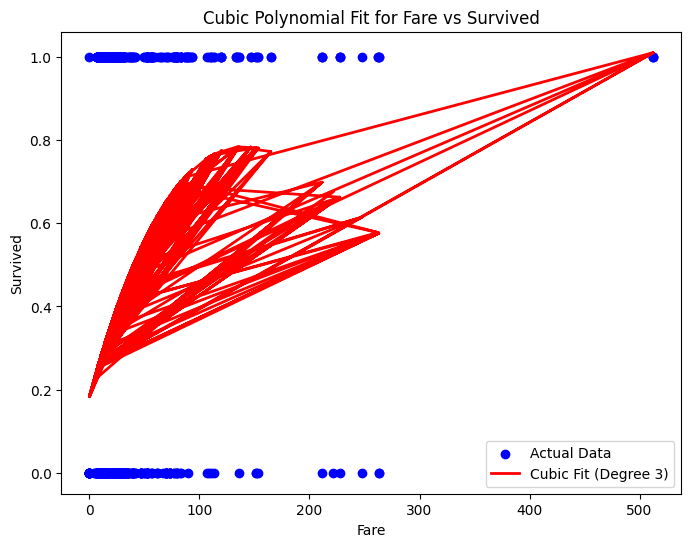

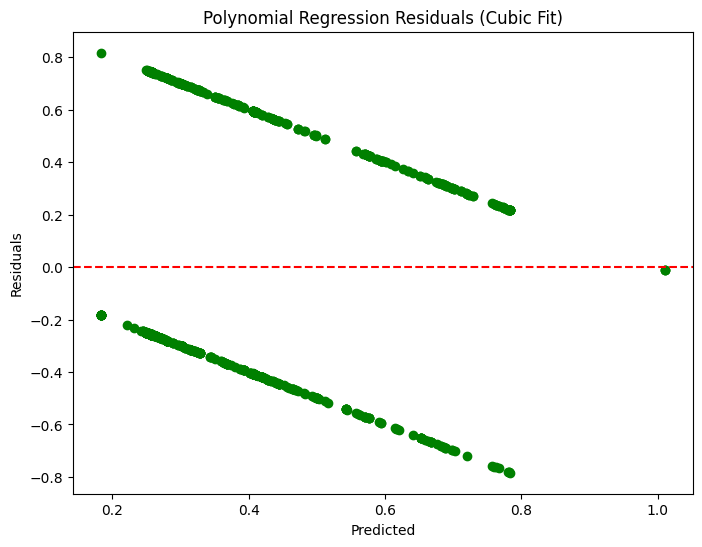

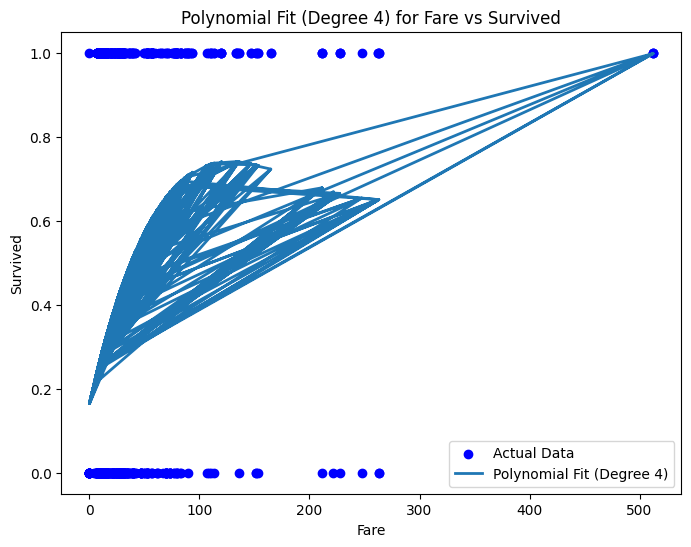

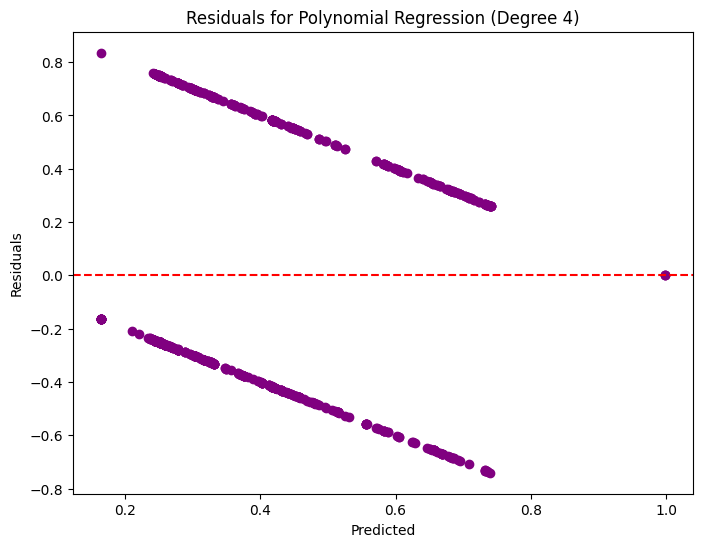

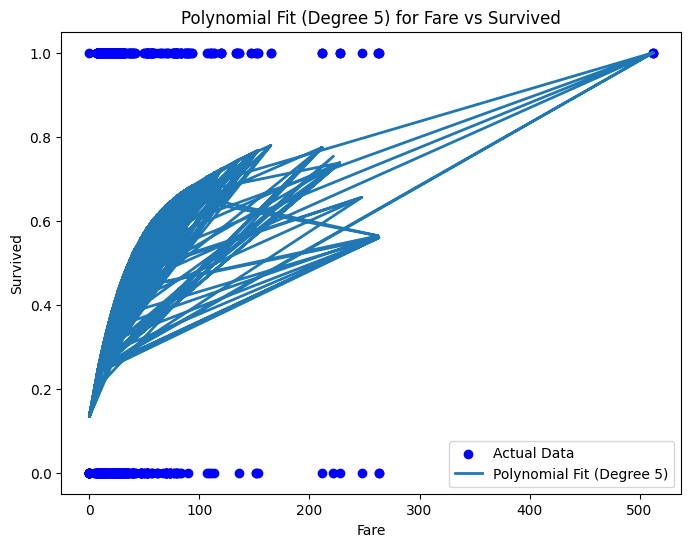

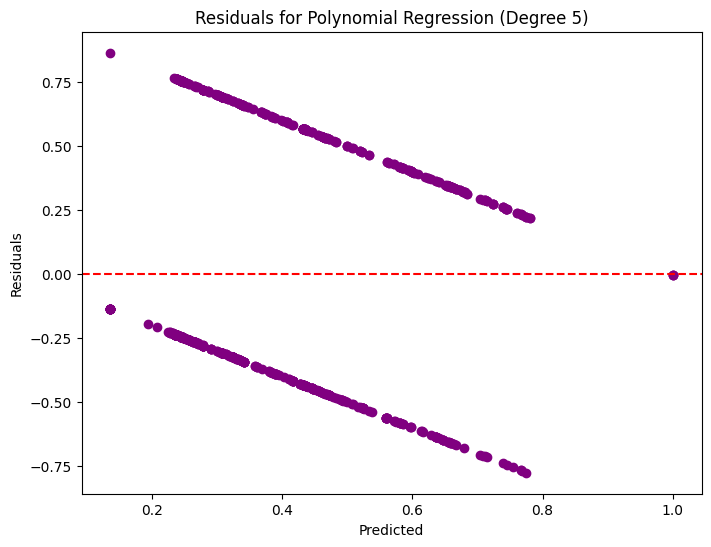

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example: We will use 'Fare' as the input feature for these visualizations
X_single_feature = df[['Fare']]  # Take only one feature for the polynomial regression
y_single_feature = df['Survived']  # Target variable

# 1. Visualize Polynomial Cubic Fit (for 1 input feature)
poly = PolynomialFeatures(degree=3)
X_poly_cubic = poly.fit_transform(X_single_feature)

# Fit a linear regression model to the transformed cubic features
model_cubic = LinearRegression()
model_cubic.fit(X_poly_cubic, y_single_feature)

# Predict using the cubic model
y_pred_cubic = model_cubic.predict(X_poly_cubic)

# Plot the cubic fit
plt.figure(figsize=(8,6))
plt.scatter(X_single_feature, y_single_feature, color='blue', label='Actual Data')
plt.plot(X_single_feature, y_pred_cubic, color='red', label='Cubic Fit (Degree 3)', linewidth=2)
plt.title('Cubic Polynomial Fit for Fare vs Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.legend()
plt.show()

# 2. Visualize Polynomial Regression Residuals for Cubic Fit
residuals_cubic = y_single_feature - y_pred_cubic
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cubic, residuals_cubic, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Polynomial Regression Residuals (Cubic Fit)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# 3. Visualize Higher Order Polynomial (for the same 1 input case)
# Now let's try higher degree polynomials like degree 4 (quartic) and degree 5 (quintic)
for degree in [4, 5]:
    poly_high_degree = PolynomialFeatures(degree=degree)
    X_poly_high = poly_high_degree.fit_transform(X_single_feature)

    model_high = LinearRegression()
    model_high.fit(X_poly_high, y_single_feature)

    y_pred_high = model_high.predict(X_poly_high)

    plt.figure(figsize=(8,6))
    plt.scatter(X_single_feature, y_single_feature, color='blue', label='Actual Data')
    plt.plot(X_single_feature, y_pred_high, label=f'Polynomial Fit (Degree {degree})', linewidth=2)
    plt.title(f'Polynomial Fit (Degree {degree}) for Fare vs Survived')
    plt.xlabel('Fare')
    plt.ylabel('Survived')
    plt.legend()
    plt.show()

    # Plot residuals for higher-degree polynomial
    residuals_high = y_single_feature - y_pred_high
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_high, residuals_high, color='purple')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals for Polynomial Regression (Degree {degree})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.show()

# Explanation

### 1. Polynomial Cubic Fit (Single Feature)
This plot visualizes the cubic polynomial fit for a single feature (e.g., "Fare"). It helps assess how well a cubic model captures non-linear relationships.

**Interpretation**: The blue scatter points are actual data, and the red curve represents the cubic polynomial fit. A good fit will follow the data trend.

---

### 2. Polynomial Regression Residual Plot
The residual plot shows the difference between predicted and actual values. It helps detect model errors or patterns not captured by the model.

**Interpretation**: The green dots are residuals. Randomly scattered points near zero indicate a good fit. Patterns in residuals suggest potential model issues.

---

### 3. Higher-Order Polynomial Fits (Degree 4 & 5)
Higher-degree polynomials (such as degree 4 and 5) provide more flexibility in capturing complex relationships in the data. However, increasing the degree can lead to overfitting, where the model starts fitting noise in the data rather than the true underlying patterns.

**Interpretation**: As the polynomial degree increases, the model fit becomes more complex, potentially improving the fit to the training data but at the cost of generalization. Overfitting occurs when the model captures noise, which may negatively impact its performance on new, unseen data.

---

### 4. Conclusion
These visualizations help in evaluating the effectiveness of polynomial regression models. A cubic fit (degree 3) is often sufficient for capturing non-linear relationships in the data, but higher-degree polynomials may improve the fit at the risk of overfitting.

**Interpretation**: The cubic polynomial fit is effective for many real-world datasets, but higher-order polynomial fits can result in overfitting, especially if the data is noisy or if the model is too complex for the underlying patterns.